# Final Project 3 (Kelompok 5)

Anggota:
1. Muhammad Taufiqul Hakim
2. M. Dwi Pratama
3. Rossanda Sevia Gadis
4. Shafira Almaisa

## Latar Belakang

Penyakit kardiovaskular (CVD) merupakan penyebab kematian nomor 1 secara global, penyakit ini diperkirakan telah merenggut 17,9 juta setiap tahun serta menyumbang 31% dari seluruh kematian di seluruh dunia.

Gagal jantung merupakan peristiwa umum yang disebabkan oleh CVD dan pada dataset terdapat 12 fitur yang dapat digunakan untuk memprediksi kematian akibat gagal jantung.

Sebagian besar penyakit kardiovaskular dapat dicegah dengan mengatasi faktor resiko perilaku seperti penggunaan tembakau, diet tidak sehat dan obesitas, aktivitas fisik dan penggunaan alkohol yang berbahaya.

Oranf dengan penyakit kardiovaskular atau yang beresiko tinggi memerlukan deteksi dini di mana model machine learning dapat sangat membantu.



## Data

Data yang digunakan pada kasus ini adalah data **Heart Failure Prediction** yang diambil dari Kaggle. Data memiliki feature sebagai berikut:

1. `age` - umur pasien
2. `anaemia` - pengurangan hemoglobin
    - 0: tidak
    - 1: ya
3. `creatinine_phosphokinase` - level enzim CPK (mcg/L)
4. `diabetes` - riwayat diabetes
    - 0: tidak
    - 1: ya
5. `ejection_fraction` - persentase darah yang meninggalkan jantung setiap kontraksi jantung (persen)
6. `high_blood_pressure` - riwayat hipertensi
    - 0: tidak
    - 1: ya
7. `platelets` - jumlah platelet di darah dalam kiloplatelets/mL
8. `serum_creatinine` - level serum creatinine di darah (mg/dL)
9. `serum_sodium` - level serum sodium di darah dalam (mEq/L)
10. `sex` - gender/jenis kelamin
    - 0: perempuan
    - 1: laki-laki
11. `smoking` - pasien merokok
    - 0: tidak
    - 1: ya
12. `time` - waktu dalam hari untuk follow-up
13. `DEATH_EVENT` - pasien sudah meninggal saat waktu follow-up
    - 0: tidak
    - 1: ya

## Capaian

# Import Pustaka

Dilakukan proses import pustaka dimana akan diakses beberapa fungsi di dalamnya yang akan digunakan untuk keperluan membangun model klasifikasi ini.

In [ ]:
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

# building model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier

# model evaluation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

# Data Loading

In [ ]:
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! kaggle datasets download -d andrewmvd/heart-failure-clinical-data

heart-failure-clinical-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip heart-failure-clinical-data.zip

Archive:  heart-failure-clinical-data.zip
replace heart_failure_clinical_records_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Proses mengimpor dataset dilakukan menggunakan fungsi `pd.read_csv`. Untuk menampilkan data teratas digunakan fungsi `.head()`

In [ ]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Dilakukan proses rename kolom untuk mempermudah proses analisis.
- kolom `anaemia` di-rename dengan nama `anemia`
- kolom `DEATH_EVENT` di-rename dengan nama `death`

Digunakan argumen `inplace=True` untuk menjadikan perubahan pada nama kolom secara permanen.

In [ ]:
df.rename(columns= {"anaemia":"anemia","DEATH_EVENT":"death"}, inplace = True)

Dimensi atau bentuk data dapat diketahui menggunakan fungsi `.shape()`

In [ ]:
df.shape

(299, 13)

Berdasarkan output, dapat diketahui bahwa terdapat 299 baris dan 13 kolom pada dataset.

Informasi yang terdapat pada dataset seperti nama kolom, informasi jumlah data non-null pada masing-masing kolom dan tipe data pada masing-masing kolom dapat diketahui menggunakan fungsi `.info()`

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anemia                    299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  death                     299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


# Data Cleaning

Pengecekan terhadap nilai null dapat dilakukan menggunakan fungsi `.isna().sum()`

In [ ]:
df.isna().sum()

age                         0
anemia                      0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
death                       0
dtype: int64

Pengecekan terhadap nilai yang memiliki duplikat dapat dilakukan menggunakan fungsi `.duplicated().sum()`

In [ ]:
df.duplicated().sum()

0

Korelasi antar kolom pada data dapat diketahui menggunakan fungsi `.corr()`

In [ ]:
df.corr()

,age,anemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


*NOTE: korelasi paling tinggi 0.2 - 0.5. Dibawah 0.2 termasuk kecil*

Berdasarkan nilai korelasi antar kolom dapat dipilih beberapa kolom yang dapat digunakan untuk membangun model. 

Kolom-kolom yang digunakan untuk membangun model diantaranya:

1. Kolom `time` memiliki korelasi yang tinggi dengan kolom target yaitu `death` sebesar -0.53. Hal ini berarti semakin sering dilakukan follow-up kondisi pasien maka resiko kematian akibat penyakit jantung semakin kecil.
2. Kolom `ejection_fraction` memiliki koefisien korelasi negatif sebesar -0.27. Hal ini berarti semakin rendah presentase darah yang keluar dari jantung maka semakin tinggi resiko kematian akibat penyakit jantung.
3. Kolom `serum_sodium` memiliki koefisien korelasi negatif sebesar -0.2. Hal ini berarti semakin rendah level serum sodium maka resiko kematian akibat penyakit jantung juga semakin tinggi.
4. Kolom `serum_creatinine` memiliki korelasi positif sebesar 0.29. Hal ini berarti semakin tinggi evel serum creatinne dalam tubuh pasien, maka resiko kematian akibat penyakit jantung juga semakin tinggi.
5. Kolom `age` memiliki korelasi positif sebesar 0.25. Hal ini berarti semakin tua usia pasien, maka reskio kematian akibat penyakit jantung semakin tinggi.
6. Kolom `anemia`, `diabetes`, `high_blood_pressure`, `sex`, `smoking` merupakan kolom dengan korelasi yang rendah. Namun, pada beberapa penelitian anemia, diabetes, hipertensi, gender, dan perilaku merokok berpengaruh terhadap resiko kematian akibat penyakit jantung.

In [ ]:
# assign kolom yang digunakan

df.drop(['creatinine_phosphokinase','platelets'],axis=1,inplace=True)

In [ ]:
df

,age,anemia,diabetes,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,sex,smoking,time,death
0,75.0,0,0,20,1,1.9,130,1,0,4,1
1,55.0,0,0,38,0,1.1,136,1,0,6,1
2,65.0,0,0,20,0,1.3,129,1,1,7,1
3,50.0,1,0,20,0,1.9,137,1,0,7,1
4,65.0,1,1,20,0,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,1,38,1,1.1,143,1,1,270,0
295,55.0,0,0,38,0,1.2,139,0,0,271,0
296,45.0,0,1,60,0,0.8,138,0,0,278,0
297,45.0,0,0,38,0,1.4,140,1,1,280,0


Dilakukan pengecekan value error atau kondisi dimana di dalam kolom-kolom yang di-assign memuat data yang tidak sesuai tipenya, setelah itu value error tersebut akan digantikan dengan NaN.

In [ ]:
# mencari value error pada kolom age
for row in df['age']:
    try:
        float(row)
        pass
    except ValueError:
        df.loc['age'] = np.nan

# mencari value error pada kolom anemia
for row in df['anemia']:
    try:
        float(row)
        pass
    except ValueError:
        df.loc['anemia'] = np.nan

# mencari value error pada kolom diabetes
for row in df['diabetes']:
    try:
        float(row)
        pass
    except ValueError:
        df.loc['diabetes'] = np.nan

# mencari value error pada kolom high_blood_pressure
for row in df['high_blood_pressure']:
    try:
        float(row)
        pass
    except ValueError:
        df.loc['high_blood_pressure'] = np.nan

# mencari value error pada kolom sex
for row in df['sex']:
    try:
        float(row)
        pass
    except ValueError:
        df.loc['sex'] = np.nan

# mencari value error pada kolom smoking
for row in df['smoking']:
    try:
        float(row)
        pass
    except ValueError:
        df.loc['smoking'] = np.nan

# mencari value error pada kolom ejection_fraction
for row in df['ejection_fraction']:
    try:
        float(row)
        pass
    except ValueError:
        df.loc['ejection_fraction'] = np.nan

# mencari value error pada kolom serum_creatinine
for row in df['serum_creatinine']:
    try:
        float(row)
        pass
    except ValueError:
        df.loc['serum_creatinine'] = np.nan

# mencari value error pada kolom serum_sodium
for row in df['serum_sodium']:
    try:
        float(row)
        pass
    except ValueError:
        df.loc['serum_sodium'] = np.nan

# mencari value error pada kolom time 
for row in df['time']:
    try:
        float(row)
        pass
    except ValueError:
        df.loc['time'] = np.nan

# mencari value error pada kolom death
for row in df['death']:
    try:
        float(row)
        pass
    except ValueError:
        df.loc['death'] = np.nan

Dilakukan pengecekan kembali terhadap data null.

In [ ]:
df.isna().sum()

age                    0
anemia                 0
diabetes               0
ejection_fraction      0
high_blood_pressure    0
serum_creatinine       0
serum_sodium           0
sex                    0
smoking                0
time                   0
death                  0
dtype: int64

Tidak ditemukan data null pada kolom.

# Eksplorasi Data (EDA)

Exploratory Data Analysis (EDA) adalah proses eksplorasi data yang bertujuan untuk memahami struktur, pola, hubungan, dan anomali dalam data. EDA merupakan langkah awal yang penting dalam analisis data dan pembuatan modelm yang membantu kita untuk memahami data dan mengidentifikasi masalah yang mungkin muncul dalam proses analisis.

In [ ]:
df.describe()

,age,anemia,diabetes,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,sex,smoking,time,death
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,0.418060,38.083612,0.351171,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,0.494067,11.834841,0.478136,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,0.000000,14.000000,0.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,0.000000,30.000000,0.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,0.000000,38.000000,0.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,1.000000,45.000000,1.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,1.000000,80.000000,1.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Describe() berfungsi untuk memperoleh ringkasan informasi mengenai ukuran pemusatan data (central tendency) dan ukuran penyebaran data (measure of spread) dari masing-masing kolom yang berisi nilai numerik pada set data. Pada kasus ini, semua kolom pada data tersebut memiliki nilai numerik.

In [ ]:
df['death'].value_counts()

0    203
1     96
Name: death, dtype: int64

Kolom 'death' merupakan target dari analisis ini, sehingga dilakukan pengecekan terhadap nilai-nilai yang ada didalamnya, dengan menggunakan value_counts() didapatkan hasil pada target 'Not Survived'(:0) berjumlah 203, dan target 'Survived'(:1) berjumlah 96 pada data tersebut.

Visualisasi frekuensi nilai pada kolom `Death Event` dapat ditampilkan menggunakan fungsi `.plot()` dengan menggunakan pie plot dengan argumen yang disesuaikan.

* `kind=''`: mendefinsikan jenis plot yang digunakan yaitu pie
* `figsize=()`: mendefinisikan ukuran plot
* `autopct=''`: menambahkan teks presentase
* `shadow=True`: menambahkan bayangan pada plot
* `colors=['']`: memberikan warna tertentu pada chart
* `explode=['']`: memberikan jarak pada masing-masing slice pada chart
* `labeldistance=`: memberikan jarak antara label dan gambar, label disini yaitu 'Not Survived' dan 'Survived'
* `startangle=`: berfungsi untuk mengatur rotasi dari plot tersebut.
* `shadow=`: berfungsi untuk memberikan bayangan/shadow pada plot.


Untuk menambahkan keterangan pada plot, dapat digunakan fungsi sebagai berikut:

* `plt.title()`: memberi judul pada plot.
* `plt.legend()`: berfungsi untuk membuat legenda label pada plot.
* `loc=`: mengatur letak dari legenda yang dibuat.

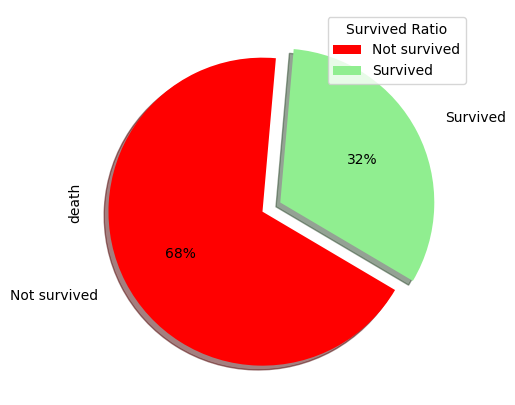

In [ ]:
label = ['Not survived', 'Survived']
stats = df['death'].value_counts()
colors = ['red', 'lightgreen']
stats.plot(kind='pie',labels=label,figsize=(7,5), autopct='%1.0f%%', labeldistance=1.2, startangle=85,explode=[0.13,0], colors=colors, shadow = True)
plt.legend(title = "Survived Ratio", loc='upper right')
plt.show()

Berdasarkan pie plot diatas diketahui bahwa rasio nilai dari target **Not Survived** sebesar 68% dari total nilai target pada kolom 'death', yang mana nilai tersebut lebih besar dibandingkan target **Survived** yang memiliki nilai 32% dari total nilai target.

In [ ]:
def diagnostic_plots(df,variable):
    plt.figure(figsize=(16,4))
    
    #Histogram
    plt.subplot(1,2,1)
    sns.histplot(df[variable],bins=20)
    plt.title('Histogram')
    
    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    
    plt.show()

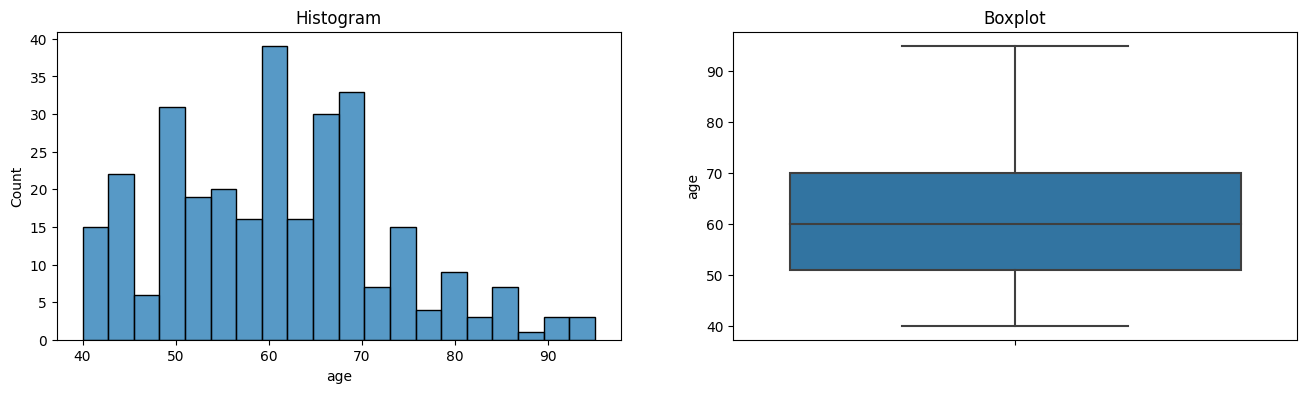

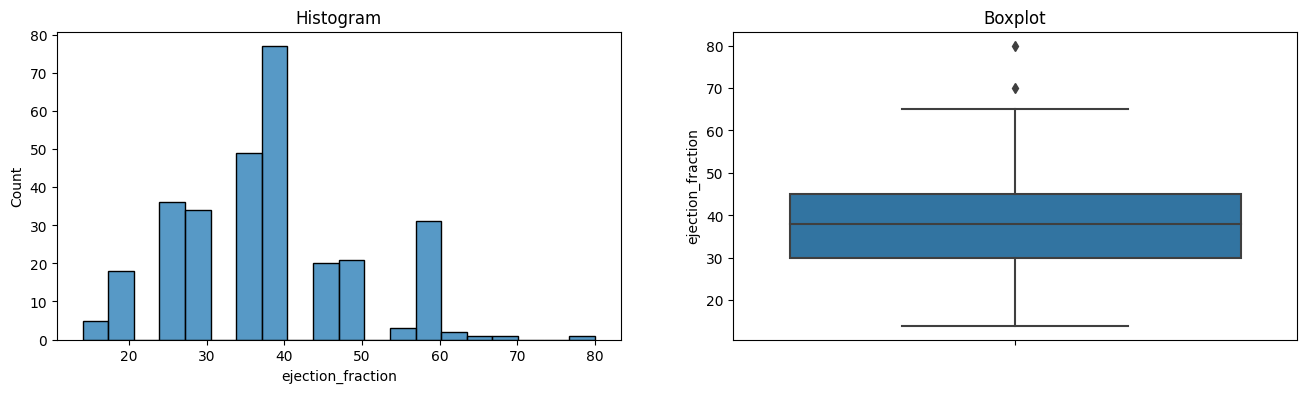

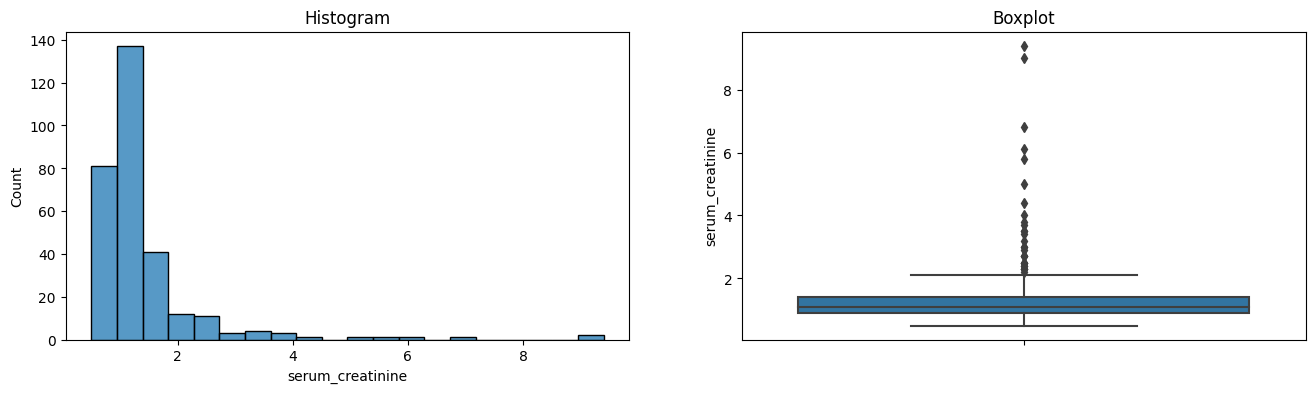

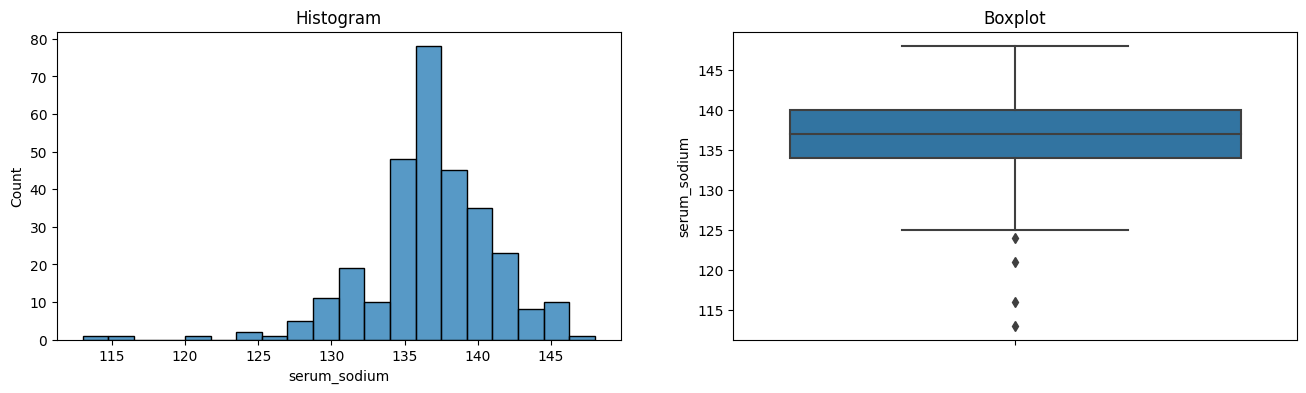

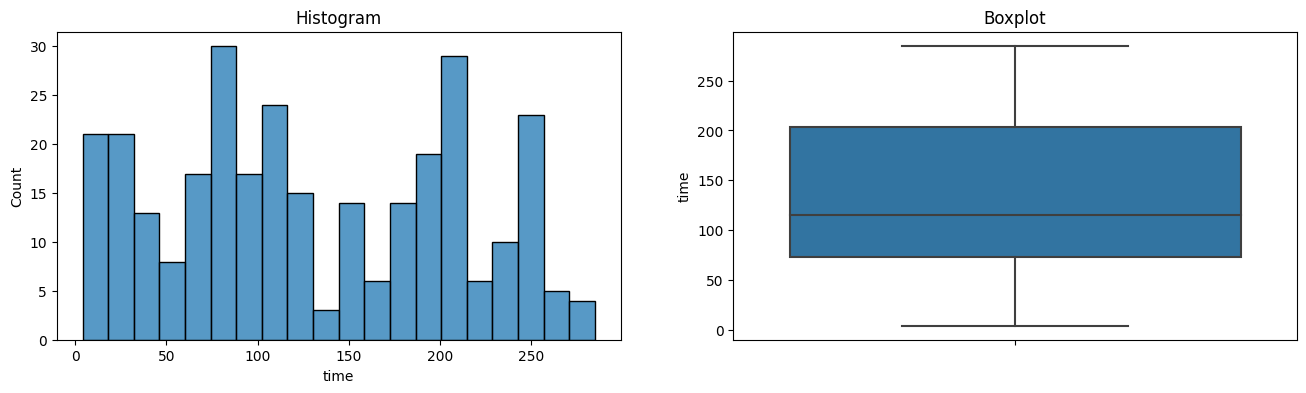

In [ ]:
diagnostic_plots(df, 'age')
diagnostic_plots(df, 'ejection_fraction')
diagnostic_plots(df, 'serum_creatinine')
diagnostic_plots(df, 'serum_sodium')
diagnostic_plots(df, 'time')

Berdasarkan diagnostic plots diatas, dapat diketahui beberapa informasi sebagai berikut:

*   Plot histogram pada kolom **Age** cenderung normal atau simetris. Hal ini dapat diketahui melalui garis median pada boxplot yang berada di tengah kotak tetapi panjang whisker bawah lebih pendek dibanding whisker atas. Selain itu, bentuk histogram menyerupai bentuk kurva lonceng. Namun, terdapat sedikit skew positif pada plot tersebut yang mana sedikit lebih condong ke kiri. Data pada kolom tersebut tidak memiliki outliers.
*   Plot histogram pada kolom **EjectionFraction** cenderung simetris. Hal ini dapat diketahui melalui garis median pada boxplot yang berada di tengah kotak dan panjang whisker bawah sama dengan panjang whisker bawah. Selain itu, bentuk histogram menyerupai bentuk kurva lonceng. Namun, terdapat sedikit skew positif pada plot tersebut yang mana sedikit lebih condong ke kiri. Data pada kolom tersebut memiliki outliers.
*   Plot histogram pada kolom **SerumCreatinine** cendrung tidak normal. Hal ini dapat diketahui melalui garis median yang berada tidak di tengah kotak dan whisker atas lebih panjang daripada whisker bawah. Selain itu, bentuk histogram tidak menyerupai bentuk kurva lonceng. Terdapat skew positif pada plot tersebut yang mana lebih condong ke kiri, dan terdapat banyak outliers pada data.
*   Plot histogram pada kolom **SerumSodium** cendrung tidak normal dan plot condong ke kanan (positif skewed). Hal ini dapat diketahui melalui bentuk plot yang lebih condong ke kanan. Namun, pada data terdapat banyak outliers di atas nilai minimum sehingga sebaran data cenderung miring ke kanan. Selain itu, bentuk histogram tidak menyerupai bentuk kurva lonceng.
*   Plot histogram pada kolom **Time** cenderung tidak normal. Hal ini dapat diketahui melalui garis median yang tidak berada di tengah kotak dan panjang whisker bawah lebih pendek daripada whisker atas. Selain itu, bentuk histogram tidak menyerupai bentuk kurva lonceng.

In [ ]:
print('Skewness of Age\t\t\t\t:', df.age.skew())
print('Skewness of Ejection Fraction\t\t:', df.ejection_fraction.skew())
print('Skewness of Serum Creatinine\t\t:', df.serum_creatinine.skew())
print('Skewness of Serum Sodium\t\t:', df.serum_sodium.skew())
print('Skewness of time\t\t\t:', df.time.skew())

Skewness of Age				: 0.42306190672863536
Skewness of Ejection Fraction		: 0.5553827516973211
Skewness of Serum Creatinine		: 4.455995882049026
Skewness of Serum Sodium		: -1.0481360160574988
Skewness of time			: 0.12780264559841184


Untuk mengetahui tingkat kemiringan dari data setelah melihat probability plot dan box plot tersebut, dapat menggunakan fungsi .skew(). Nilai dari koefisien skewness dapat digunakan untuk mengetahui tingkat kemiringan atau sebaran data.
- Nilai koefisien skewness > nol (0) : positive skewed (mean > median > modus)
- Nilai koefisien skewness = nol (0) : simetrical data (mean = median = modus)
- NIlai koefisien skewness < nol (0) : negative skewed (mean < median < modus)

Dari hasil analisis skewed diatas diperoleh :
- Kolom **Age** dan **EjectionFraction** cendrung normal/simetris karena nilai skewnessnya mendekati 0.
- Kolom **SerumCreatinine** dan **Time** cendrung positif skewed karena nilai skewnessnya lebih besar dari nol.
- Kolom **SerumSodium** cendrung negative skewed karena nilai skewnessnya lebih kecil dari nol.

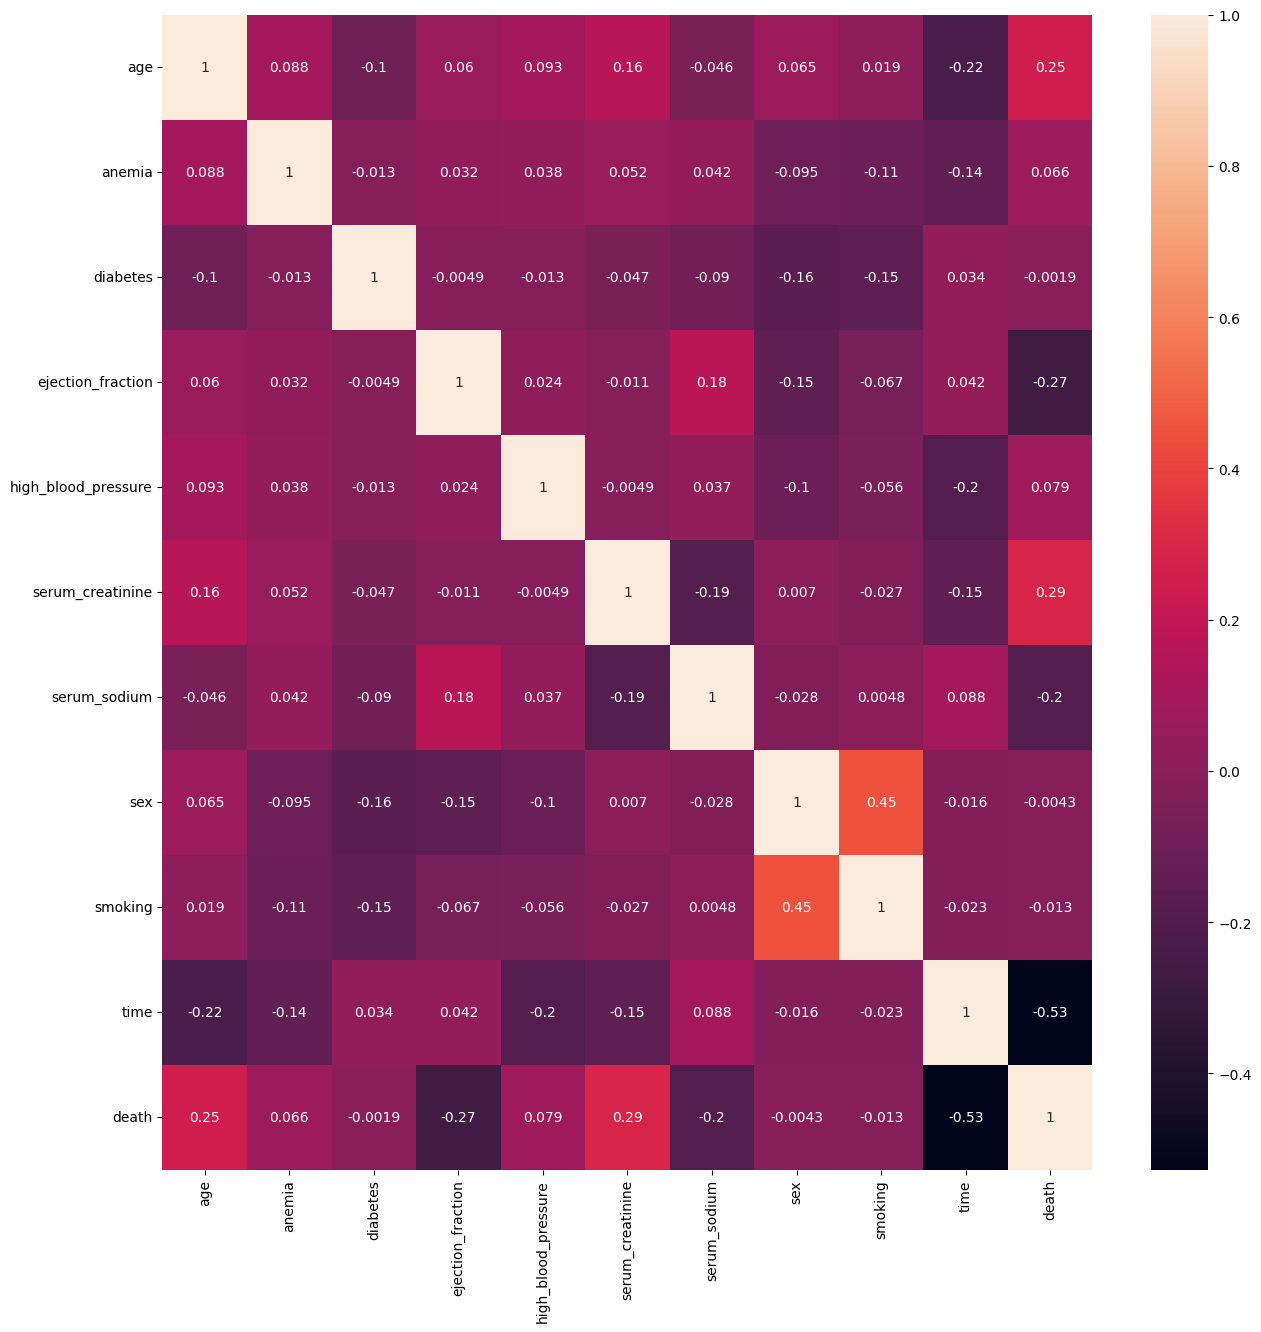

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(df.corr(),annot=True)
plt.show()

Berdasarkan hasil dari Correlation heatmap Plot dengan menggunakan seaborn diketahui bahwa korelasi paling tinggi terhadap kolom target **death** yaitu kolom **time**, **serumcreatinine**, dan **age**. 

# Pre-Processing Data

## Splitting Data

Splitting data yaitu membagi data menjadi dua bagian atau lebih yang membentuk subhimpunan data. Umumnya, data splitting memisahkan dua bagian, bagian pertama digunakan untuk mengevaluasi atau uji data dan data lainnya digunakan untuk melatih model. Dalam analisis ini data training digunakan untuk melatih model, sedangkan data testing digunakan untuk mengevaluasi model.

- X : data feature
- y : data label (target)

In [ ]:
X = df.drop(columns='death',axis=1)
y = df['death']

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

Setelah data feature (X) dan data target (y) didefinisikan, dilakukan standarisasi pada data tersebut dengan menggunakan fungsi `StandarScaler()`

In [ ]:
ros = RandomOverSampler(random_state=42)

X_ros, y_ros = ros.fit_resample(X, y)
print(y.value_counts())
print(y_ros.value_counts())

0    203
1     96
Name: death, dtype: int64
1    203
0    203
Name: death, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.3, random_state=0)

In [ ]:
print('Training dataset\t:', len(X_train))
print('Testing dataset\t\t:', len(X_test))

Training dataset	: 284
Testing dataset		: 122


# Pendefinisian model

In [ ]:
model_lr = LogisticRegression(solver ='liblinear',multi_class ='ovr',max_iter = 100)
model_svm = SVC(kernel='linear', C=100.0, probability=True)
model_dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = None)

In [ ]:
# Ensemble of Models 
estimator = [] 
estimator.append(('LR', model_lr)) 
estimator.append(('SVC', model_svm)) 
estimator.append(('DTC', model_dtc))

## Voting Classifier

### Hard Voting

In [ ]:
# Pendefinisian Model
hard_voting = VotingClassifier(estimators = estimator, voting ='hard') 

### Soft Voting

In [ ]:
# Pendefinisian Model
soft_voting = VotingClassifier(estimators = estimator, voting ='soft') 

## Stacking

In [ ]:
model_stacking = StackingClassifier(estimators=estimator)

# Pelatihan Model

## Voting Classifier

### Hard Voting

In [ ]:
# Fitting model
hard_voting.fit(X_train, y_train)

VotingClassifier(estimators=[('LR',
                              LogisticRegression(multi_class='ovr',
                                                 solver='liblinear')),
                             ('SVC',
                              SVC(C=100.0, kernel='linear', probability=True)),
                             ('DTC',
                              DecisionTreeClassifier(criterion='entropy'))])

In [ ]:
# mengecek overfitting
print('train set score : ', hard_voting.score(X_train, y_train))
print('test set score : ', hard_voting.score(X_test, y_test))

train set score :  0.8591549295774648
test set score :  0.8032786885245902


In [ ]:
# Predict data
y_pred_train_hard = hard_voting.predict(X_train)
y_pred_test_hard = hard_voting.predict(X_test)

In [ ]:
train = pd.DataFrame(y_train)
train['Predict_Train'] = y_pred_train_hard
train

,death,Predict_Train
191,0,0
297,0,0
233,0,0
49,1,1
349,1,1
...,...,...
323,1,1
192,0,0
117,0,1
47,1,1


In [ ]:
test = pd.DataFrame(y_test)
test['Predict_Test'] = y_pred_test_hard
test

,death,Predict_Test
175,0,0
239,0,0
60,1,1
231,0,0
134,0,1
...,...,...
96,0,1
145,0,0
89,0,1
364,1,1


### Soft Voting

In [ ]:
# Fitting Model
soft_voting.fit(X_train, y_train)

VotingClassifier(estimators=[('LR',
                              LogisticRegression(multi_class='ovr',
                                                 solver='liblinear')),
                             ('SVC',
                              SVC(C=100.0, kernel='linear', probability=True)),
                             ('DTC',
                              DecisionTreeClassifier(criterion='entropy'))],
                 voting='soft')

In [ ]:
# mengecek overfitting
print('train set score : ', soft_voting.score(X_train, y_train))
print('test set score : ', soft_voting.score(X_test, y_test))

train set score :  0.9683098591549296
test set score :  0.8852459016393442


In [ ]:
# Predict data
y_pred_train_soft = soft_voting.predict(X_train)
y_pred_test_soft = soft_voting.predict(X_test)

In [ ]:
train = pd.DataFrame(y_train)
train['Predict_Train'] = y_pred_train_soft
train

,death,Predict_Train
191,0,0
297,0,0
233,0,0
49,1,1
349,1,1
...,...,...
323,1,1
192,0,0
117,0,0
47,1,1


In [ ]:
test = pd.DataFrame(y_test)
test['Predict_Test'] = y_pred_test_soft
test

,death,Predict_Test
175,0,0
239,0,0
60,1,1
231,0,0
134,0,0
...,...,...
96,0,1
145,0,0
89,0,1
364,1,1


## Stacking

In [ ]:
# Voting Classifier with hard voting 
model_stacking.fit(X_train, y_train)

StackingClassifier(estimators=[('LR',
                                LogisticRegression(multi_class='ovr',
                                                   solver='liblinear')),
                               ('SVC',
                                SVC(C=100.0, kernel='linear',
                                    probability=True)),
                               ('DTC',
                                DecisionTreeClassifier(criterion='entropy'))])

In [ ]:
# mengecek overfitting
print('train set score : ', model_stacking.score(X_train, y_train))
print('test set score : ', model_stacking.score(X_test, y_test))

train set score :  0.9823943661971831
test set score :  0.8852459016393442


In [ ]:
# Predict data
y_pred_train_stacking = model_stacking.predict(X_train)
y_pred_test_stacking = model_stacking.predict(X_test)

In [ ]:
train = pd.DataFrame(y_train)
train['Predict_Train'] = y_pred_train_stacking
train

,death,Predict_Train
191,0,0
297,0,0
233,0,0
49,1,1
349,1,1
...,...,...
323,1,1
192,0,0
117,0,0
47,1,1


In [ ]:
test = pd.DataFrame(y_test)
test['Predict_Test'] = y_pred_test_stacking
test

,death,Predict_Test
175,0,0
239,0,0
60,1,1
231,0,0
134,0,0
...,...,...
96,0,1
145,0,0
89,0,1
364,1,1


# Evaluasi Model

## Voting Classifier

### Hard Voting

In [ ]:
print('Accuracy score data train model Hard Voting adalah :',accuracy_score(y_train, y_pred_train_hard))
print('Accuracy score data test model Hard Voting adalah :',accuracy_score(y_test, y_pred_test_hard))


Accuracy score data train model Hard Voting adalah : 0.8591549295774648
Accuracy score data test model Hard Voting adalah : 0.8032786885245902


- Accuracy score mewakili seberapa baik model tersebut dalam memprediksi seberapa baik nilai cocok dibandingkan dengan nilai aslinya. Rentang nilai diwakili dari 0 sampai 1 dan diartikan sebagai presentase, semakin tinggi nilainya, semakin baik modelnya. Terlihat hasil akurasi pada model Hard Voting sebesar 0.803 atau sebesar 80% dapat disimpulkan bahwa model tersebut sudah cukup baik dalam memprediksi data. Juga dapat dilihat dari selisih accuracy score, data training lebih besar dari 0.057 atau 5% data testing yang dapat disimpulkan terjadi overfitting pada model Hard Voting tersebut.




Hasil Classification Report Hard Voting
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        53
           1       0.83      0.83      0.83        69

    accuracy                           0.80       122
   macro avg       0.80      0.80      0.80       122
weighted avg       0.80      0.80      0.80       122



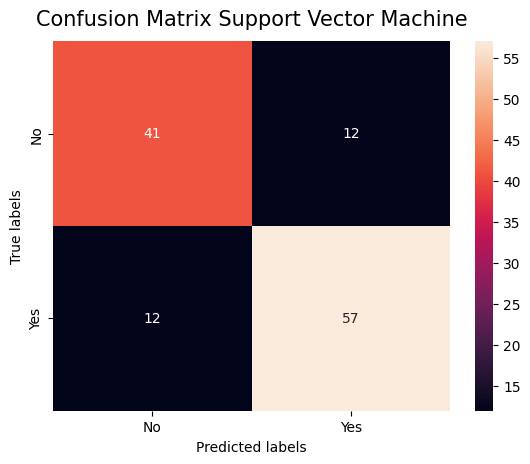

In [ ]:
print('\nHasil Classification Report Hard Voting')
print(classification_report(y_test,y_pred_test_hard)) 

cm_hard = confusion_matrix(y_test,y_pred_test_hard)
ax= plt.subplot()
sns.heatmap(cm_hard, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Support Vector Machine', y=1.02, fontsize=15); 
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes']);

- Dari classsification Report diketahui precision adalah banyaknya sampel yang benar-benar termasuk dalam kelas positif dari semua sampel yang diprediksi menjadi kelas positif oleh model, sedangkan recall adalah banyaknya sampel yang diprediksi dengan benar menjadi kelas positif dari semua sampel yang benar-benar termasuk kelas positif. Dari hasil analisis nilai recall sebesar 0.77 (:0) dan 0.83 (:1) cukup mendekati nilai precision yaitu 0.77 (:0) dan 0.83 (:1), sehingga model sudah cukup baik dalam memprediksi. Namun, untuk membuat model semakin akurat selisih antara nilai recall dan precision harus semakin kecil lagi.

- Dari Counfusion Matrix diketahuin bahwa True Negatif (TN) sebanyak 41, false negatif (FN) sebanyak 12, false positif (FP) sebanyak  12, dan true positif (TP) sebanyak 57.

### Soft Voting

In [ ]:
print('Accuracy score data train model Soft Voting adalah :',accuracy_score(y_train, y_pred_train_soft))
print('Accuracy score data test model Soft Voting adalah :',accuracy_score(y_test, y_pred_test_soft))


Accuracy score data train model Soft Voting adalah : 0.9683098591549296
Accuracy score data test model Soft Voting adalah : 0.8852459016393442


- Accuracy score mewakili seberapa baik model tersebut dalam memprediksi seberapa baik nilai cocok dibandingkan dengan nilai aslinya. Rentang nilai diwakili dari 0 sampai 1 dan diartikan sebagai presentase, semakin tinggi nilainya, semakin baik modelnya. Terlihat hasil akurasi pada model Soft Voting sebesar 0.877 atau sebesar 88% dapat disimpulkan bahwa model tersebut sudah cukup baik dalam memprediksi data. Juga dapat dilihat dari selisih accuracy score, data training lebih besar 0.091 atau 9% dari data testing yang dapat disimpulkan terjadi overfitting pada model Soft Voting tersebut.




Hasil Classification Report Hard Voting
              precision    recall  f1-score   support

           0       0.91      0.81      0.86        53
           1       0.87      0.94      0.90        69

    accuracy                           0.89       122
   macro avg       0.89      0.88      0.88       122
weighted avg       0.89      0.89      0.88       122



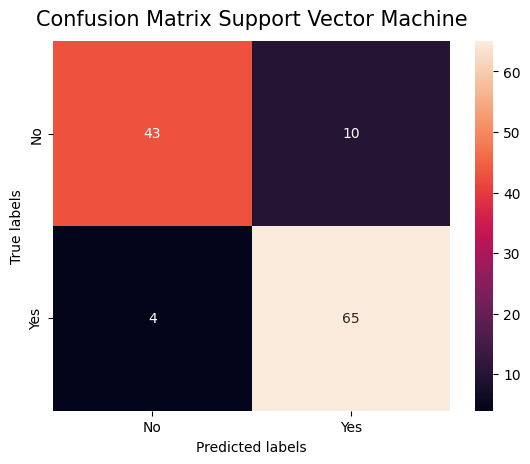

In [ ]:
print('\nHasil Classification Report Hard Voting')
print(classification_report(y_test,y_pred_test_soft)) 

cm_soft = confusion_matrix(y_test,y_pred_test_soft)
ax= plt.subplot()
sns.heatmap(cm_soft, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Support Vector Machine', y=1.02, fontsize=15); 
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes']);

- Dari classsification Report diketahui precision adalah banyaknya sampel yang benar-benar termasuk dalam kelas positif dari semua sampel yang diprediksi menjadi kelas positif oleh model, sedangkan recall adalah banyaknya sampel yang diprediksi dengan benar menjadi kelas positif dari semua sampel yang benar-benar termasuk kelas positif. Dari hasil analisis nilai recall sebesar 0.79 (:0) dan 0.94 (:1) cukup mendekati nilai precision yaitu 0.91 (:0) dan 0.86 (:1), sehingga model sudah cukup baik dalam memprediksi. Namun, untuk membuat model semakin akurat selisih antara nilai recall dan precision harus semakin kecil lagi.

- Dari Counfusion Matrix diketahuin bahwa True Negatif (TN) sebanyak 42, false negatif (FN) sebanyak 4, false positif (FP) sebanyak  11, dan true positif (TP) sebanyak 65.

# Kesimpulan

** Dari Hasil Analisis diatas dapat ditarik kesimpulan sebagai berikut:**

- Dari hasil analisis feature selection age,	anemia,	diabetes,	ejection_fraction,	high_blood_pressure,	serum_creatinine,	serum_sodium,	sex,	smoking,	time,	death, kita gunakan dalam membangun model kita dapatkan bahwa berdasarkan data tersebut kita dapat memperkirakan resiko orang menderita gagal ginjal dengan akurasi prediksi sebesar 80-88%.

-